<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7b70d;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Comment on this Notebook</strong>
<p> This notebook contains an overview of the dataset <a href="https://www.kaggle.com/datasets/pooriamst/best-books-ever-dataset">books_1.Best_Books_Ever</a>. The data was cleaned, some calculation, EDA and inferential statistiscal tests were run to get an idea of the data. Also some visualizations were created. Afterwards, the data was saved and imported to MySql to analyze it further.</p>
</div>

<h1 style="color: #e3db24;">00 | Libraries and Settings</h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import ast

In [4]:
# ⚙️ Settings 
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #e3db24;">01 | Data Extraction and Exploration</h1>

In [6]:
data = pd.read_csv("original_dataset_kaggle/booksGR.csv")

In [7]:
best_books = data.copy()

<h2 style="color: #ec7511;">Exploring the Data (First Impressions)</h2>

In [9]:
best_books.shape

(52478, 25)

In [10]:
best_books.loc[6:9]

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,NaN,141,Signet Classics,04/28/96,08/17/45,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.00,"['England', 'United Kingdom']",https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42
7,11127.The_Chronicles_of_Narnia,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,"C.S. Lewis, Pauline Baynes (Illustrator)",4.26,"Journeys to the end of the world, fantastic cr...",English,9999999999999,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...","['Polly', 'Aslan', 'Lucy Pevensie', 'Edmund Pe...",Paperback,Reissue Edition,767,HarperCollins,09/16/02,10/28/56,[],517740,"['254964', '167572', '74362', '15423', '5419']",96.00,"['London, England']",https://i.gr-assets.com/images/S/compressed.ph...,1238556,12949,NaN
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9780345538376,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",Mass Market Paperback,Hobbit Movie Tie-in Boxed set,1728,Ballantine Books,09/25/12,10/20/55,[],110146,"['78217', '22857', '6628', '1477', '967']",98.00,['Middle-earth'],https://i.gr-assets.com/images/S/compressed.ph...,1159802,12111,21.15
9,18405.Gone_with_the_Wind,Gone with the Wind,NaN,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,9780446675536,"['Classics', 'Historical Fiction', 'Fiction', ...","[""Scarlett O'Hara"", 'Rhett Butler', 'Ashley Wi...",Mass Market Paperback,NaN,1037,Warner Books,04/01/99,06/30/36,"['Pulitzer Prize for Novel (1937)', 'National ...",1074620,"['602138', '275517', '133535', '39008', '24422']",94.00,"['Atlanta, Georgia (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,1087732,11211,5.58


In [11]:
empty_strings = best_books[(best_books == "").all(axis=1) | best_books.isnull().all(axis=1)]
empty_strings

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price


In [12]:
best_books.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

bookId : Book Identifier as in goodreads.com
title : Book title
series: Series Name
author: Book's Author
rating: Global goodreads rating
description: Book's description
language: Book's language
ISBN: Book's ISBN
genres: Book's genres
characters: Main characters
bookFormat: Type of binding
edition: Type of edition (ex. Anniversary Edition)
pages: Number of pages
publisher: Editorial
publishDate: publication date
firstPublishDate: Publication date of first edition
awards: List of awards
numRatings: Number of total ratings
ratingsByStars: Number of ratings by stars
likedPercent: Derived field, percent of ratings over 2 starts (as in GoodReads)
setting: Story setting
coverImg: URL to cover image
bbeScore: Score in Best Books Ever list
bbeVotes: Number of votes in Best Books Ever list
price: Book's price (extracted from Iberlibro)

In [14]:
best_books.dtypes

bookId               object
title                object
series               object
author               object
rating              float64
description          object
language             object
isbn                 object
genres               object
characters           object
bookFormat           object
edition              object
pages                object
publisher            object
publishDate          object
firstPublishDate     object
awards               object
numRatings            int64
ratingsByStars       object
likedPercent        float64
setting              object
coverImg             object
bbeScore              int64
bbeVotes              int64
price                object
dtype: object

In [15]:
best_books.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.00,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.00,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.00,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.00,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.00,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [16]:
best_books.tail()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,NaN,0,Cheri Schmidt,May 28th 2011,NaN,[],871,"['311', '310', '197', '42', '11']",94.00,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],Paperback,First Edition,190,Bokheim Publishing,August 5th 2011,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.00,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],Paperback,NaN,280,CreateSpace,March 18th 2011,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.00,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],Paperback,1st edition,507,Cascada Productions,September 1st 2011,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90.00,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86
52477,10991547-daughter-of-helaman,Daughter of Helaman,Stripling Warrior #1,Misty Moncur (Goodreads Author),4.02,Fighting in Helaman's army is Keturah's deepes...,English,9781599554976,"['Lds Fiction', 'Historical Fiction', 'Young A...",[],Paperback,NaN,201,Bonneville,May 8th 2011,NaN,[],246,"['106', '73', '42', '17', '8']",90.00,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.20


In [17]:
best_books.sample(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
7549,69882.Billiards_at_Half_Past_Nine,Billiards at Half-Past Nine,NaN,"Heinrich Böll, Patrick Bowles (Translator)",3.93,"Heinrich Böll's well-known, vehement oppositio...",English,9780140187243,"['Fiction', 'German Literature', 'Classics', '...",['Robert Faehmel'],Paperback,NaN,288,Penguin Classics,September 1st 1994,10/28/59,[],3600,"['1161', '1361', '797', '216', '65']",92.00,['Germany'],https://i.gr-assets.com/images/S/compressed.ph...,353,5,5.26
39445,25637.Celebration,Celebration,NaN,Harry Crews,3.68,Now from the author the Washington Post Book W...,English,9780684848105,"['Fiction', 'Southern', 'Southern Gothic', 'Hu...",[],Paperback,NaN,272,Touchstone,January 28th 1999,11/06/98,[],609,"['145', '212', '181', '57', '14']",88.00,[],https://i.gr-assets.com/images/S/compressed.ph...,83,1,6.96
36460,7501962-bonhoeffer,"Bonhoeffer: Pastor, Martyr, Prophet, Spy",NaN,Eric Metaxas (Goodreads Author),4.21,As Adolf Hitler and the Nazis seduced a nation...,English,9781595551382,"['Biography', 'History', 'Nonfiction', 'Christ...",['Dietrich Bonhoeffer'],Hardcover,NaN,608,Thomas Nelson,April 18th 2010,08/21/09,"['ECPA Christian Book Award (2011)', 'John C. ...",58437,"['30184', '16950', '6815', '2357', '2131']",92.00,[],https://i.gr-assets.com/images/S/compressed.ph...,88,1,8.66
20448,410389.Father_Melancholy_s_Daughter,Father Melancholy's Daughter,Margaret Bonner #1,Gail Godwin,3.96,The novels of Gail Godwin are contemporary cla...,English,9780380729869,"['Fiction', 'Contemporary', 'Literary Fiction'...",[],Paperback,NaN,416,William Morrow Paperbacks,March 26th 2002,03/01/91,['Alabama Author Award for Fiction (1993)'],1894,"['574', '802', '414', '82', '22']",95.00,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,6.45
37727,999731.Passage_to_Mutiny,Passage to Mutiny,Richard Bolitho #9,"Alexander Kent, Douglas Reeman",4.08,"October 1789, and war clouds thunder over Euro...",English,9780935526585,"['Historical Fiction', 'Fiction', 'Historical'...",[],Paperback,NaN,352,McBooks Press,April 1st 1999,11/06/76,[],1069,"['351', '478', '213', '24', '3']",97.00,[],https://i.gr-assets.com/images/S/compressed.ph...,86,1,5.89
43020,13602913-chasing-mccree,Chasing McCree,Chasing McCree #1,J.C. Isabella (Goodreads Author),3.95,"Briar Thompson had it all. The right clothes, ...",English,B007UASYB0,"['Young Adult', 'Romance', 'Contemporary', 'Hi...",[],Kindle Edition,NaN,182,J.C. Isabella Books,April 14th 2012,NaN,[],6416,"['2329', '2108', '1458', '370', '151']",92.00,"['Montana (United States)', 'Florida (United S...",https://i.gr-assets.com/images/S/compressed.ph...,75,1,NaN
51568,17869239-real-ugly,Real Ugly,Hard Rock Roots #1,C.M. Stunich (Goodreads Author),3.86,Turner Campbell is an asshole.I f*cking hate h...,English,B00DB7419K,"['Romance', 'New Adult', 'Music', 'Contemporar...","['Turner Campbell', 'Naomi Knox']",Kindle Edition,NaN,286,Sarian Royal,June 9th 2013,NaN,[],10175,"['3382', '3527', '2119', '722', '425']",89.00,[],https://i.gr-assets.com/images/S/compressed.ph...,18,2,NaN
31454,4679892-zargana,Zargana,NaN,Hakan Günday,3.75,"Kimsenin birbirine bakmadığı, yalan, ihanet, ş...",Turkish,9789759914899,"['Turkish Literature', 'Turkish', 'Novels']",[],NaN,NaN,192,Doğan Kitap,October 2007,11/05/02,[],1575,"['373', '586', '484', '110', '22']",92.00,[],https://i.gr-assets.com/images/S/compressed.ph...,94,1,18.24
18198,651385.Defending_India,Defending India,NaN,Jaswant Singh,3.57,As India concludes the Golden Jubilee celebrat...,English,9780312220662,['India'],[],Hardcover,NaN,369,Palgrave Macmillan,February 15th 1999,12/01/98,[],23,"['6', '8', '5', '1', '3']",83.00,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,81.36
832,19691.The_Hunt_for_Red_October,The Hunt for Red October,Jack Ryan #3,Tom Clan

<h3 style="color: #ec300e;">Exploring Specific Columns</h3>

In [19]:
best_books.rating.mean()

4.021877929799154

In [20]:
best_books.bbeScore[:10]

0    2993816
1    2632233
2    2269402
3    1983116
4    1459448
5    1372809
6    1276599
7    1238556
8    1159802
9    1087732
Name: bbeScore, dtype: int64

In [21]:
best_books.price.unique()

array(['5.09', '7.38', nan, ..., '86.64', '36.13', '27.70'], dtype=object)

In [22]:
best_books.likedPercent.unique()

array([ 96.,  98.,  95.,  94.,  78.,  91.,  93.,  88.,  89.,  92.,  86.,
        87.,  90.,  97.,  80.,  99.,  79.,  83.,  81.,  82.,  84.,  85.,
        77., 100.,  76.,  73.,  75.,  72.,  69.,  74.,  70.,  67.,  71.,
        55.,  66.,  29.,  68.,  65.,  nan,  61.,  56.,  52.,  64.,  63.,
        19.,  38.,  62.,  57.,  48.,  59.,  60.,  33.,  58.,  50.,  45.,
        51.,   0.,  40.,  37.,  49.,  36.,  46.,  20.,  43.,  18.,  42.,
        27.])

In [23]:
best_books.publishDate.unique()[500:1000:5]

array(['09/03/01', '04/29/03', '06/22/06', '11/05/13', '01/04/01',
       '10/01/16', '03/25/19', '09/09/99', '01/23/01', '10/03/06',
       '09/15/18', '10/17/06', '04/28/09', '05/09/06', '07/13/10',
       '10/01/98', '10/11/11', '10/05/09', '07/06/07', '10/23/12',
       '07/01/95', '01/02/16', '11/09/04', '04/04/11', '07/28/02',
       '03/13/04', '04/29/08', 'August 3rd 2004', 'April 7th 2015',
       'March 7th 2000', 'September 28th 2000', 'October 1st 1990',
       'October 30th 2001', 'May 7th 1991', 'May 17th 2006',
       'September 6th 2012', 'August 21st 1997', 'October 1st 1991',
       'March 8th 2004', 'September 7th 2004', 'October 2003',
       'July 1st 2005', 'October 1st 1996', 'January 11th 2011',
       'June 29th 1993', 'March 2nd 2010', 'September 6th 2016',
       'January 15th 1997', 'December 7th 2013', 'January 1st 2004',
       'September 26th 2006', 'June 1st 2003', 'January 25th 2011',
       'October 2nd 2006', 'April 22nd 2008', 'October 22nd 1998',
  

In [24]:
best_books.isna().sum()

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

<h1 style="color: #e3db24;">02 | Data Cleaning</h1>

<h2 style="color: #ec7511;">Feature Selection (Dropping unnecesary features)</h2>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7b70d;
    border-radius: 4px;
    background-color: #e2ee1e;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Column Dropping:</strong>
<p>In the following, I will drop all columns which I will not use for my analysis with SQL. Please check <a href="end-to-end_sql-project_dataset and questions.docx" target="_blank">this document</a> for my analysis questions which determine which columns will be of use to me.</p>
</div>

In [28]:
books_sql = best_books[["bookId", "title", "author", "rating", "language", "genres", "bookFormat", "pages", "awards", "bbeScore", "price"]]

In [29]:
books_sql.head(1)

,bookId,title,author,rating,language,genres,bookFormat,pages,awards,bbeScore,price
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Hardcover,374,['Locus Award Nominee for Best Young Adult Boo...,2993816,5.09


<h2 style="color: #ec7511;">Checking Null Values</h2>

In [31]:
books_sql.isna().sum()

bookId            0
title             0
author            0
rating            0
language       3806
genres            0
bookFormat     1473
pages          2347
awards            0
bbeScore          0
price         14365
dtype: int64

<h3 style="color: #ec300e;">Dropping all rows with NaNs</h3>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7b70d;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next Steps:</strong>
<p>I will drop all rows which have NaNs in them so to have clean data for the SQL analysis.</p>
</div>

In [34]:
books_sql.dropna(axis=0, how="any", inplace=True)
books_sql.isna().sum()

bookId        0
title         0
author        0
rating        0
language      0
genres        0
bookFormat    0
pages         0
awards        0
bbeScore      0
price         0
dtype: int64

<div style="
    padding: 10px; 
    margin: 10px 0; 
    border: 1px solid #ffeeba; 
    border-radius: 4px; 
    background-color: #f7d90d; 
    color: #bb1066;
    line-height: 1.5;
    word-wrap: break-word;">
    <strong>More NaNs:</strong> I now found some "hidden NaNs" in "genres". All cells in this column are encoded in [], 1,255 of which are empty. I will drop these rows.
</div>

In [36]:
books_sql[books_sql["genres"] == "[]"]

,bookId,title,author,rating,language,genres,bookFormat,pages,awards,bbeScore,price
2272,24536832-song-bird,Song Bird: Matters of the Heart,Christine M. Knight (Goodreads Author),4.55,English,[],Paperback,304,[],1685,18.5
3023,40949958-treacherous-estate,Treacherous Estate,Behcet Kaya (Goodreads Author),4.32,English,[],Paperback,314,[],1140,14.82
3359,35517449-the-koalemos-initiative,The Koalemos Initiative,P.H. Wilson (Goodreads Author),3.82,English,[],Paperback,106,[],993,9.98
3943,40273980-avaland,Avaland,Amy Croucher Rose,4.58,English,[],Paperback,342,[],800,15.38
4405,17608096-obscured-darkness,Obscured Darkness (Family Secrets #2),Rebekah McClew (Goodreads Author),5.00,English,[],Paperback,292,[],691,11.36
...,...,...,...,...,...,...,...,...,...,...,...
52340,3457930-refus-global-projections-lib-rantes,Refus Global; Projections Libérantes,Paul-Emile Borduas,4.00,English,[],Unknown Binding,153,[],4,11.09
52353,382076.Diana_Princess_of_Wales,Diana Princess of Wales,"Brian Hoey, Vivian Brett (Editor)",4.25,English,[],Paperback,32,[],3,1.45
52374,16075260-diccionario-de-m-sica-mitolog-a-magia...,"Diccionario de música, mitología, magia y reli...",Ramón Andrés,4.38,Spanish,[],Hardcover,1776,[],3,59.00
52402,7336903-letters-home-from-the-crimea,Letters Home from The Crimea: A Young Cavalrym...,"Temple Godman, Philip Warner (Editor)",3.85,English,[],Paperback,224,[],2,3.06


In [37]:
books_sql = books_sql[books_sql["genres"] != "[]"]

In [38]:
books_sql.shape

(34155, 11)

In [39]:
books_sql.isna().sum()

bookId        0
title         0
author        0
rating        0
language      0
genres        0
bookFormat    0
pages         0
awards        0
bbeScore      0
price         0
dtype: int64

<h2 style="color: #ec7511;">Checking Duplicates</h2>

In [41]:
books_sql.duplicated().sum()

24

In [42]:
books_sql.drop_duplicates(inplace=True)

<h2 style="color: #ec7511;">Checking Empty Spaces</h2>

In [44]:
books_sql.eq(" ").sum()

bookId        0
title         0
author        0
rating        0
language      0
genres        0
bookFormat    0
pages         0
awards        0
bbeScore      0
price         0
dtype: int64

<h2 style="color: #ec7511;">Correcting Datatypes</h2>

In [46]:
books_sql.dtypes

bookId         object
title          object
author         object
rating        float64
language       object
genres         object
bookFormat     object
pages          object
awards         object
bbeScore        int64
price          object
dtype: object

In [47]:
# pages and price should be int respective float
# firstPublishDate should be datetime but is not cleaned yet because I might not use it for the SQL analysis

books_sql['pages'] = pd.to_numeric(books_sql['pages'], errors='coerce')
books_sql['price'] = pd.to_numeric(books_sql['price'], errors='coerce')

In [48]:
books_sql.dtypes

bookId         object
title          object
author         object
rating        float64
language       object
genres         object
bookFormat     object
pages         float64
awards         object
bbeScore        int64
price         float64
dtype: object

In [49]:
books_sql.isna().sum()

bookId         0
title          0
author         0
rating         0
language       0
genres         0
bookFormat     0
pages         12
awards         0
bbeScore       0
price          9
dtype: int64

In [50]:
# dropping NaNs in "pages" and "price", they were created by converting the dtype
books_sql.dropna(axis=0, subset=["pages", "price"], inplace=True)

In [51]:
books_sql.isna().sum()

bookId        0
title         0
author        0
rating        0
language      0
genres        0
bookFormat    0
pages         0
awards        0
bbeScore      0
price         0
dtype: int64

In [52]:
books_sql.dtypes

bookId         object
title          object
author         object
rating        float64
language       object
genres         object
bookFormat     object
pages         float64
awards         object
bbeScore        int64
price         float64
dtype: object

In [53]:
books_sql['pages'] = books_sql['pages'].astype('int64')

In [54]:
books_sql.dtypes

bookId         object
title          object
author         object
rating        float64
language       object
genres         object
bookFormat     object
pages           int64
awards         object
bbeScore        int64
price         float64
dtype: object

<h2 style="color: #ec7511;">Cleaning "bookId"</h2>

In [56]:
# some values in bookId are more than once, this cannot be because I need a unique key for SQL, so I will drop every second or third mentioning
books_sql = books_sql.drop_duplicates(subset=["bookId"], keep="first")

<h2 style="color: #ec7511;">Resetting the Index</h2>

In [58]:
books_sql.reset_index(drop=True, inplace=True)
books_sql.head(10)

,bookId,title,author,rating,language,genres,bookFormat,pages,awards,bbeScore,price
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Hardcover,374,['Locus Award Nominee for Best Young Adult Boo...,2993816,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",Paperback,870,['Bram Stoker Award for Works for Young Reader...,2632233,7.38
2,41865.Twilight,Twilight,Stephenie Meyer,3.60,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",Paperback,501,"['Georgia Peach Book Award (2007)', 'Buxtehude...",1459448,2.10
3,19063.The_Book_Thief,The Book Thief,Markus Zusak (Goodreads Author),4.37,English,"['Historical Fiction', 'Fiction', 'Young Adult...",Hardcover,552,['National Jewish Book Award for Children’s an...,1372809,3.80
4,170448.Animal_Farm,Animal Farm,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,English,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",Mass Market Paperback,141,"['Prometheus Hall of Fame Award (2011)', 'Retr...",1276599,4.42
5,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.60,English,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...",Mass Market Paperback,1728,[],1159802,21.15
6,18405.Gone_with_the_Wind,Gone with the Wind,Margaret Mitchell,4.30,English,"['Classics', 'Historical Fiction', 'Fiction', ...",Mass Market Paperback,1037,"['Pulitzer Prize for Novel (1937)', 'National ...",1087732,5.58
7,370493.The_Giving_Tree,The Giving Tree,Shel Silverstein,4.37,English,"['Childrens', 'Picture Books', 'Classics', 'Fi...",Hardcover,64,[],1021534,4.87
8,6185.Wuthering_Heights,Wuthering Heights,"Emily Brontë, Richard J. Dunn (Editor), David ...",3.86,English,"['Classics', 'Fiction', 'Romance', 'Gothic', '...",Paperback,464,[],981502,2.73
9,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,4.12,English,"['Fiction', 'Historical Fiction', 'Romance', '...",Mass Market Paperback,503,[],862748,2.76


<h1 style="color: #e3db24;">03 | Feature Engineering</h1>

<h2 style="color: #ec7511;">New column "genre"</h2>

In [61]:
books_sql.genres.unique()[:2]

array(["['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']",
       "['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Adventure', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy']"],
      dtype=object)

In [62]:
# I will erase the list structure and only keep the first genre category for better analytical purposes

import ast # Abstract Syntax Tree

# ast.literal_eval converts "genres" into a real python list to be able to extract a part of it
books_sql["genre"] = books_sql["genres"].apply(
    lambda g: ast.literal_eval(g)[0] if ast.literal_eval(g) else None
)

In [63]:
books_sql.sample(3)

,bookId,title,author,rating,language,genres,bookFormat,pages,awards,bbeScore,price,genre
26315,218637.The_Hungry_Moon,The Hungry Moon,Ramsey Campbell,3.61,English,"['Horror', 'Fiction', 'Fantasy', 'Werewolves',...",Mass Market Paperback,368,['British Fantasy Award for Best Novel (1988)'],81,6.00,Horror
2154,43892.Blood_of_the_Fold,Blood of the Fold,Terry Goodkind,3.99,English,"['Fantasy', 'Fiction', 'Epic Fantasy', 'Scienc...",Mass Market Paperback,623,[],1323,3.95,Fantasy
13100,2363092.Kiss_of_Fury,Kiss of Fury,Deborah Cooke (Goodreads Author),4.01,English,"['Paranormal Romance', 'Dragons', 'Paranormal'...",Paperback,392,[],126,3.69,Paranormal Romance


In [64]:
# dropping "genres" and keep only "genre"
books_sql.drop(columns=["genres"], inplace=True)

<h2 style="color: #ec7511;">New column "number_awards"</h2>

In [66]:
books_sql.awards.unique()[1:2]

array(['[\'Bram Stoker Award for Works for Young Readers (2003)\', \'Anthony Award for Young Adult (2004)\', "Mythopoeic Fantasy Award for Children\'s Literature (2008)", \'Audie Award for Audiobook of the Year (2004)\', \'Books I Loved Best Yearly (BILBY) Awards for Older Readers (2004)\', \'Colorado Blue Spruce Young Adult Book Award (2006)\', \'Golden Archer Award for Middle/Junior High (2005)\', \'Deutscher Jugendliteraturpreis Nominee for Preis der Jugendjury (2004)\', \'Carnegie Medal Nominee (2003)\']'],
      dtype=object)

In [67]:
books_sql.loc[24414, "awards"]

'[]'

In [68]:
# the function counts all entried in "awards", creates a new column "number_awards" in which the count will be saved

def count_awards(awards_str):
    try:
        awards_list = ast.literal_eval(awards_str) # string i converted to python list format
        return len(awards_list) # returns number of entries in the list
    except:
        return 0 # for no awards 

books_sql["number_awards"] = books_sql["awards"].apply(count_awards)

In [69]:
# dropping "awards" and keep only "number_awards"
books_sql.drop(columns=["awards"], inplace=True)

In [70]:
books_sql.sample(5)

,bookId,title,author,rating,language,bookFormat,pages,bbeScore,price,genre,number_awards
6845,8239438-boys-don-t-cry,Boys Don't Cry,Malorie Blackman (Goodreads Author),4.09,English,Hardcover,302,288,3.20,Young Adult,3
8408,23310763-the-anatomical-shape-of-a-heart,The Anatomical Shape of a Heart,Jenn Bennett (Goodreads Author),3.94,English,Hardcover,304,225,4.10,Young Adult,2
5440,16120434-fairytales-for-wilde-girls,Fairytales for Wilde Girls,Allyse Near (Goodreads Author),4.16,English,Paperback,432,387,22.77,Fantasy,4
10475,813198.The_Manufacture_of_Madness,The Manufacture of Madness,Thomas Szasz,4.06,English,Paperback,406,182,6.25,Psychology,0
29617,541703.Waiting_for_the_Wild_Beasts_to_Vote,Waiting for the Wild Beasts to Vote,"Ahmadou Kourouma, Jana Karfíková (Translator)",3.89,English,Paperback,445,64,3.47,Africa,0


<h2 style="color: #ec7511;">New column "main_author"</h2>

In [72]:
books_sql.author

0                                          Suzanne Collins
1                J.K. Rowling, Mary GrandPré (Illustrator)
2                                          Stephenie Meyer
3                          Markus Zusak (Goodreads Author)
4        George Orwell, Russell Baker (Preface), C.M. W...
                               ...                        
34101                       DiAnn Mills (Goodreads Author)
34102                     Sherry Gammon (Goodreads Author)
34103                    Kim Richardson (Goodreads Author)
34104    Tom Pollack (Goodreads Author), John Loftus (G...
34105                      Misty Moncur (Goodreads Author)
Name: author, Length: 34106, dtype: object

In [73]:
# I am keeping only the first name in author for visualisation reasons
books_sql["main_author"] = books_sql["author"].str.split(',').str[0]

In [74]:
# some cells contain the additional info "Goodreads Author", I will delete this as it is of no interest to me and disturbs the visuals

books_sql["main_author"] = books_sql["main_author"].str.replace(r" \(Goodreads Author\)", "", regex=True)

In [75]:
books_sql["main_author"]

0        Suzanne Collins
1           J.K. Rowling
2        Stephenie Meyer
3           Markus Zusak
4          George Orwell
              ...       
34101        DiAnn Mills
34102      Sherry Gammon
34103     Kim Richardson
34104        Tom Pollack
34105       Misty Moncur
Name: main_author, Length: 34106, dtype: object

In [76]:
# dropping "author" and keep only "one_author"
books_sql.drop(columns=["author"], inplace=True)

<h1 style="color: #e3db24;">04 | Basic EDA with Visualisations</h1>

In [78]:
books_sql.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,"34,106.00",3.99,0.28,1.90,3.81,4.00,4.18,5.00
pages,"34,106.00",342.51,232.50,0.00,230.00,320.00,402.00,"14,777.00"
bbeScore,"34,106.00","2,150.89","35,582.33",0.00,83.00,98.00,218.00,"2,993,816.00"
price,"34,106.00",8.94,22.92,0.84,3.17,5.13,8.02,898.64
number_awards,"34,106.00",0.57,1.43,0.00,0.00,0.00,1.00,41.00


<h2 style="color: #ec7511;">Selecting Numericals</h2>

In [80]:
num = books_sql.select_dtypes("number")
num.head(2)

,rating,pages,bbeScore,price,number_awards
0,4.33,374,2993816,5.09,41
1,4.50,870,2632233,7.38,9


<h3 style="color: #ec300e;">Histograms for Numerical Columns</h3>

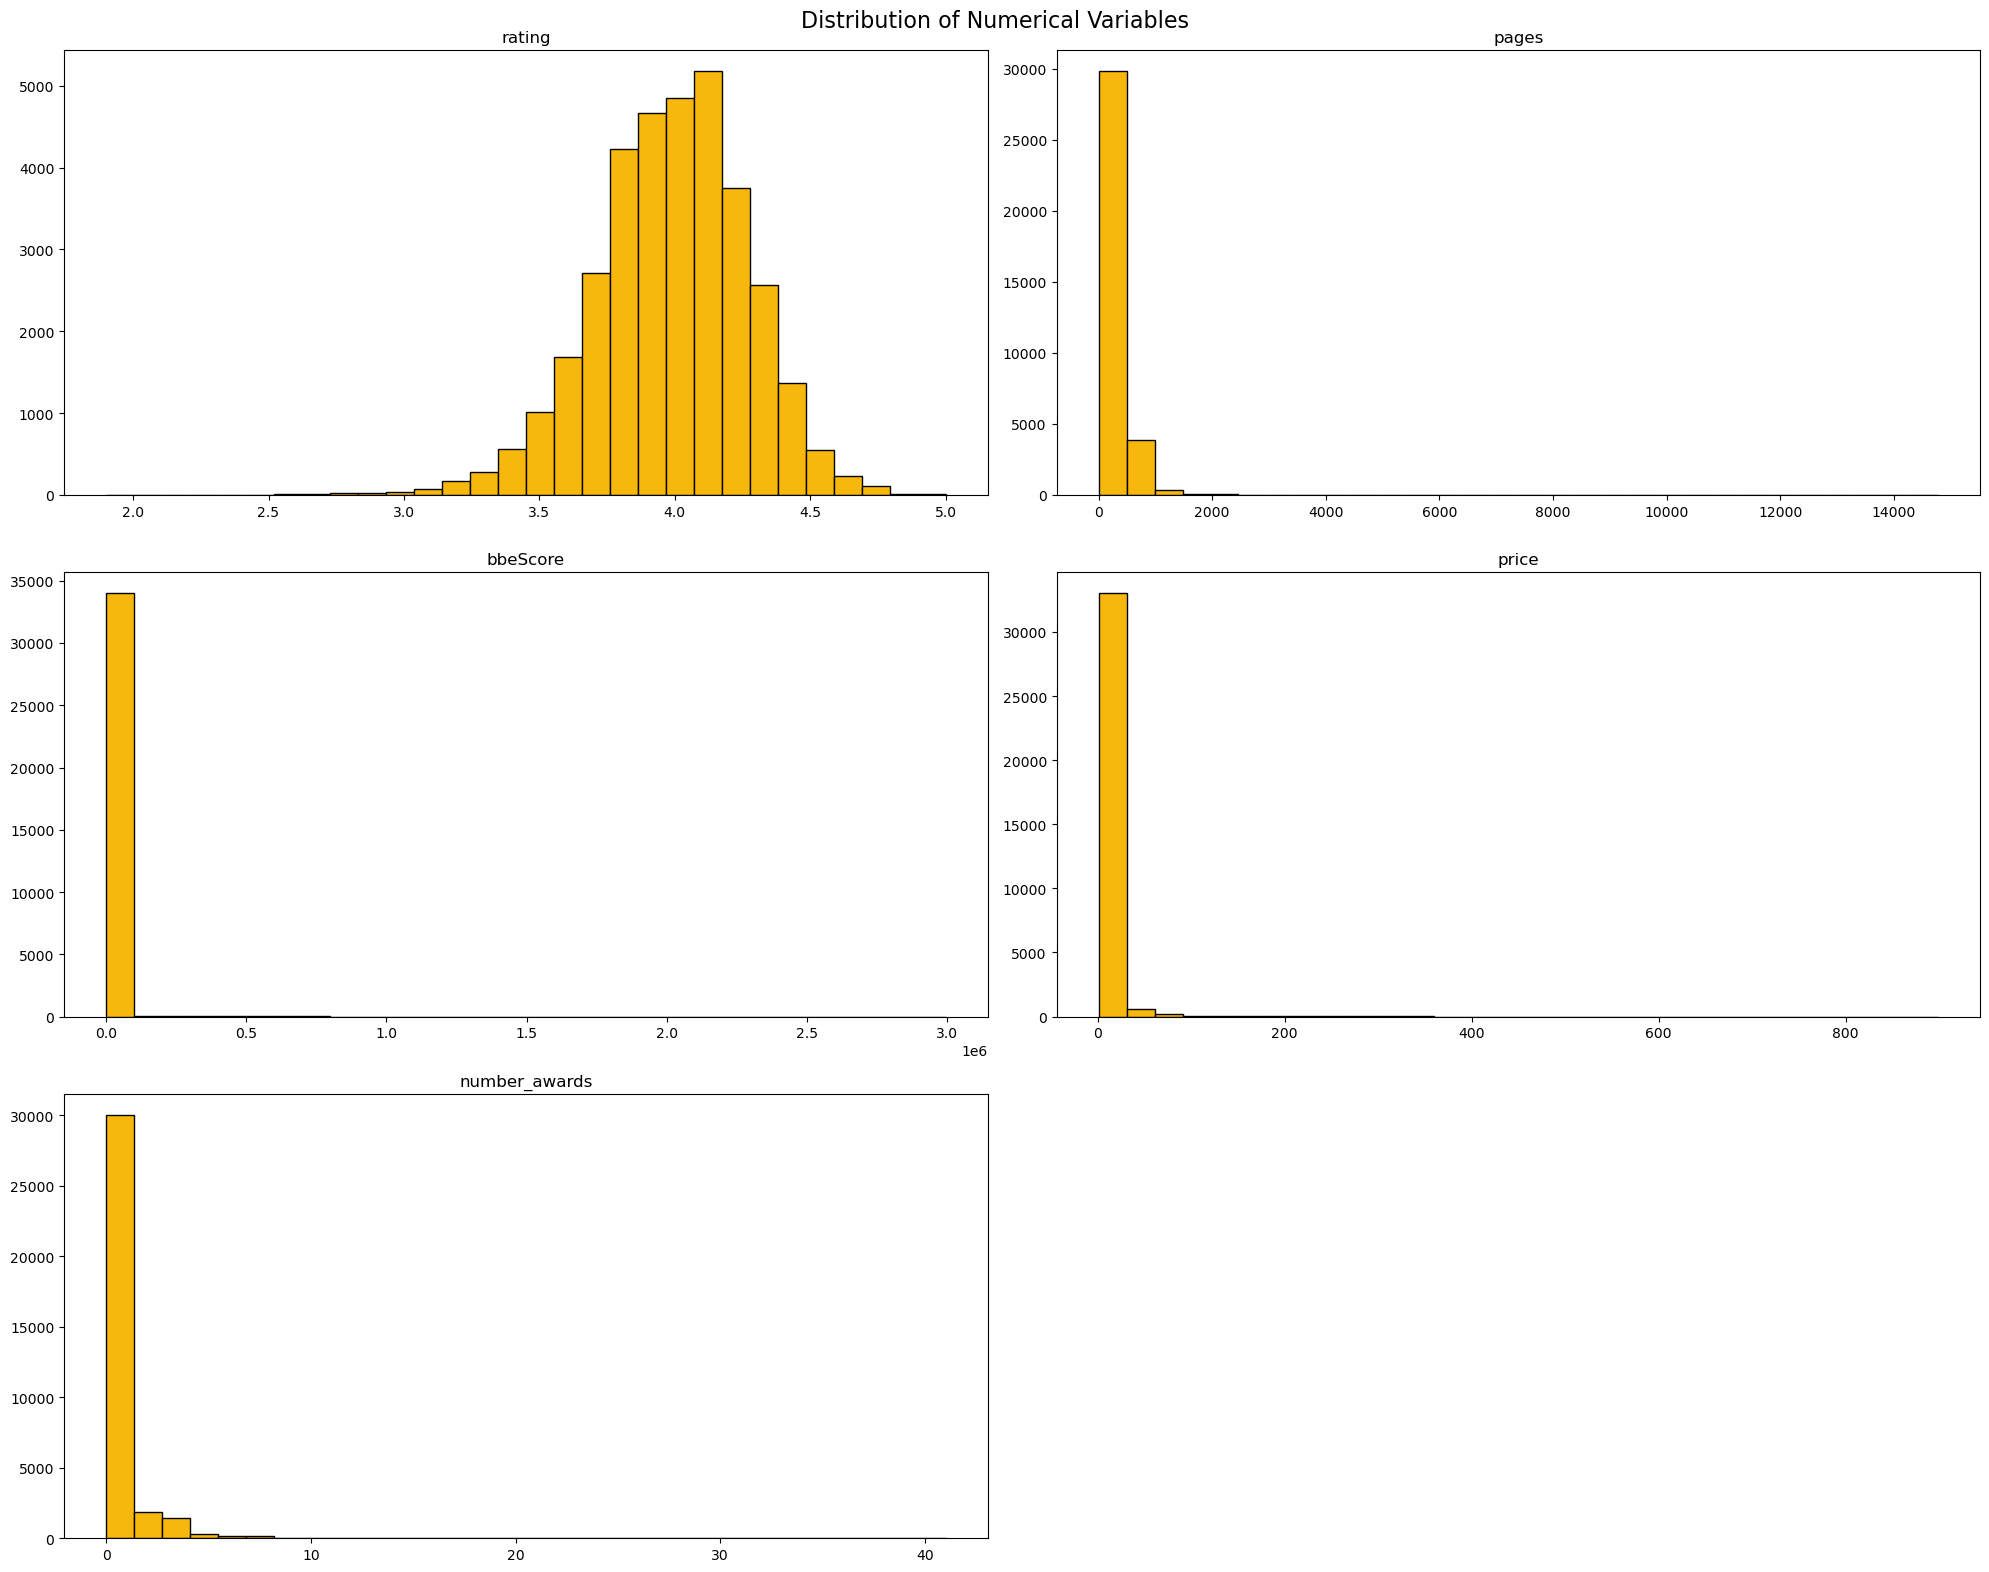

In [82]:
# histogram for numberical columns

color = '#f7b70d'
nrows, ncols = 3, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

fig.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions from Histograms:</strong>
    <ul>
        <li>"rating" shows a negative skew and a unimodal distribution narrowly centered around a value near 4.</li>
        <li>"pages", "bbeScore", "price" and "number_awards" show a highly positively skewed distribution with most values at the very low end but outliers at higher values.</li>
    </ul>
</d>

<h3 style="color: #ec300e;">Correlations between Numerical Columns</h3>

In [85]:
num_corr_pearson = round(num.corr(), 2) # linear relationship
num_corr_spearman = round(num.corr(method="spearman"), 2) # monotonic relationship

In [86]:
num_corr_pearson # linear relationship

,rating,pages,bbeScore,price,number_awards
rating,1.00,0.16,0.03,0.12,-0.00
pages,0.16,1.00,0.03,0.12,0.02
bbeScore,0.03,0.03,1.00,-0.01,0.20
price,0.12,0.12,-0.01,1.00,-0.03
number_awards,-0.00,0.02,0.20,-0.03,1.00


In [87]:
num_corr_spearman # monotonic relationship

,rating,pages,bbeScore,price,number_awards
rating,1.00,0.11,0.10,0.20,-0.02
pages,0.11,1.00,0.15,-0.02,0.08
bbeScore,0.10,0.15,1.00,-0.04,0.23
price,0.20,-0.02,-0.04,1.00,-0.04
number_awards,-0.02,0.08,0.23,-0.04,1.00


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Weak Correlations</strong>
    <ul>
        <li>The highest linear correlation is between number_awards and bbeScore with 0.20.</li>
        <li>The highest monotonic correlation is between rating and price but also rather low with 0.20.</li>
    </ul>
</d>

<h2 style="color: #ec7511;">Selecting Categorials</h2>

In [90]:
cat = books_sql.select_dtypes(exclude="number")
cat.head(2)

,bookId,title,language,bookFormat,genre,main_author
0,2767052-the-hunger-games,The Hunger Games,English,Hardcover,Young Adult,Suzanne Collins
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,English,Paperback,Fantasy,J.K. Rowling


<h3 style="color: #ec300e;">Frequency Tables</h3>

In [92]:
cat.title.value_counts()[:10]

title
Selected Poems     13
Legacy             11
Haunted             9
Forbidden           8
The Reckoning       7
Possession          7
Hunted              7
Collected Poems     7
Inferno             6
Nemesis             6
Name: count, dtype: int64

In [93]:
cat[cat["title"] == "Selected Poems"]

,bookId,title,language,bookFormat,genre,main_author
2270,316943.Selected_Poems,Selected Poems,English,Hardcover,Poetry,Robert Frost
13436,65335.Selected_Poems,Selected Poems,English,Paperback,Poetry,Langston Hughes
13655,33015.Selected_Poems,Selected Poems,English,Paperback,Poetry,Thomas Hardy
17618,626685.Selected_Poems,Selected Poems,English,Paperback,Poetry,Marina Tsvetaeva
20422,171094.Selected_Poems,Selected Poems,English,Paperback,Poetry,Anna Akhmatova
20508,752886.Selected_Poems,Selected Poems,English,Paperback,Poetry,Walt Whitman
23658,26599.Selected_Poems,Selected Poems,English,Paperback,Poetry,E.E. Cummings
24815,236183.Selected_Poems,Selected Poems,English,Paperback,Poetry,Kenneth Rexroth
24869,386270.Selected_Poems,Selected Poems,English,Paperback,Poetry,T.S. Eliot
26852,10190153-selected-poems,Selected Poems,English,Paperback,Poetry,Christina Rossetti


In [94]:
cat.main_author.value_counts()[:10]

main_author
Nora Roberts               81
James Patterson            79
Agatha Christie            73
Stephen King               72
Terry Pratchett            58
Erin Hunter                54
Karen Kingsbury            53
Carolyn Keene              53
Meg Cabot                  51
Alex Archer (pseudonym)    50
Name: count, dtype: int64

In [95]:
cat.language.value_counts()[:10]

language
English       31938
French          454
Spanish         450
German          382
Italian         162
Portuguese      138
Dutch            96
Turkish          87
Japanese         68
Arabic           64
Name: count, dtype: int64

In [96]:
print("Book Format (count)")
cat.bookFormat.value_counts()[:10]

Book Format (count)


bookFormat
Paperback                20669
Hardcover                10174
Mass Market Paperback     2325
Kindle Edition             447
ebook                       67
Audio CD                    60
Unknown Binding             51
Trade Paperback             48
Audiobook                   21
Library Binding             18
Name: count, dtype: int64

In [97]:
print("Genre (count)")
cat.genre.value_counts()[:10]

Genre (count)


genre
Fiction               5001
Fantasy               4068
Young Adult           2512
Nonfiction            2008
Historical Fiction    1862
Mystery               1605
Romance               1417
Science Fiction       1063
Classics               868
History                757
Name: count, dtype: int64

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions from Frequency Tables:</strong>
    <ul>
        <li>Nora Roberts has the most books in the list, followed by James Patterson, Agatha Christie and Stephen King.</li>
        <li>English is by far the leading language, followed by French, Spanish and German.</li>
        <li>The most prominent format is the paperback, followed by a hardcover. Kindle is already on 4th place.</li>
        <li>The most current genre is fiction, followed by fantasy and young adult.</li>
    </ul>
</d>

<h2 style="color: #ec7511;">Categorials and Numericals</h2>

In [100]:
books_sql.head(2)

,bookId,title,rating,language,bookFormat,pages,bbeScore,price,genre,number_awards,main_author
0,2767052-the-hunger-games,The Hunger Games,4.33,English,Hardcover,374,2993816,5.09,Young Adult,41,Suzanne Collins
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,English,Paperback,870,2632233,7.38,Fantasy,9,J.K. Rowling


<h3 style="color: #ec300e;">"title" and "price"</h3>

In [102]:
print("Book Title by Price")
books_sql.groupby("title")["price"].max().sort_values(ascending=False)[:10]

Book Title by Price


title
I See by My Outfit                                                                     898.64
Margin of Safety: Risk-Averse Value Investing Strategies for the Thoughtful Investor   867.05
V/Crying of Lot 49/Gravity's Rainbow                                                   811.04
Men's Garments, 1830-1900: Guide to Pattern Cutting and Tailoring                      796.14
Viper's Creed                                                                          791.43
Progeny                                                                                777.35
Children of Time                                                                       711.55
The Oxford English Dictionary (20 Volume Set)                                          653.73
Revolutionary Letters                                                                  631.99
Fantasy Pieces in Callot's Manner                                                      570.41
Name: price, dtype: float64

In [103]:
print("Book Title and Author by Price")

title_author_by_price = (
    books_sql
    .groupby(["main_author", "title"])
    .agg({"price": "max"})
    .sort_values("price", ascending=False)
    .head(10)
)

title_author_by_price

Book Title and Author by Price


,,price
main_author,title,
Peter S. Beagle,I See by My Outfit,898.64
Seth A. Klarman,Margin of Safety: Risk-Averse Value Investing Strategies for the Thoughtful Investor,867.05
Thomas Pynchon,V/Crying of Lot 49/Gravity's Rainbow,811.04
R.I. Davis,"Men's Garments, 1830-1900: Guide to Pattern Cutting and Tailoring",796.14
T.L. Shreffler,Viper's Creed,791.43
Patrick C. Greene,Progeny,777.35
Adrian Tchaikovsky,Children of Time,711.55
John Andrew Simpson (Editor),The Oxford English Dictionary (20 Volume Set),653.73
Diane di Prima,Revolutionary Letters,631.99


<div style="
    padding: 10px; 
    margin: 10px 0; 
    border: 1px solid #ffeeba; 
    border-radius: 4px; 
    background-color: #f7d90d; 
    color: #bb1066;
    line-height: 1.5;
    word-wrap: break-word;">
    <strong>High Prices:</strong> There are some very high prices (as could be seen before in the histogram). 147 books are priced over €150, going up to almost €900. These are probably some antiques, rare editions or encyclopaedia.
</div>


In [105]:
books_sql[books_sql["price"] > 150].sort_values(by="price", ascending=False)

,bookId,title,rating,language,bookFormat,pages,bbeScore,price,genre,number_awards,main_author
21647,640975.I_See_by_My_Outfit,I See by My Outfit,4.11,English,Paperback,238,92,898.64,Nonfiction,0,Peter S. Beagle
19669,746936.Margin_of_Safety,Margin of Safety: Risk-Averse Value Investing ...,4.34,English,Hardcover,248,95,867.05,Finance,0,Seth A. Klarman
33305,181656.V_Crying_of_Lot_49_Gravity_s_Rainbow,V/Crying of Lot 49/Gravity's Rainbow,4.41,English,Hardcover,0,21,811.04,Fiction,0,Thomas Pynchon
23701,2205263.Men_s_Garments_1830_1900,"Men's Garments, 1830-1900: Guide to Pattern Cu...",4.42,English,Paperback,176,88,796.14,Fashion,0,R.I. Davis
8980,13606970-viper-s-creed,Viper's Creed,4.29,English,ebook,301,198,791.43,Fantasy,0,T.L. Shreffler
...,...,...,...,...,...,...,...,...,...,...,...
18491,609518.The_Encyclopedia_of_Fantastic_Victoriana,The Encyclopedia of Fantastic Victoriana,4.47,English,Hardcover,1009,96,152.54,Fantasy,0,Jess Nevins
6312,1199688.Babel_17,Babel-17,3.77,English,Hardcover,192,322,152.54,Science Fiction,2,Samuel R. Delany
5934,25709.Summa_Theologica_5_Vols,"Summa Theologica, 5 Vols",4.13,English,Hardcover,3020,354,152.30,Philosophy,0,Thomas Aquinas
26502,9137763-a-kingdom-far-and-clear,A Kingdom Far and Clear: The Complete Swan Lak...,4.19,English,Hardcover,320,80,151.80,Fantasy,0,Mark Helprin


<h3 style="color: #ec300e;">"main_author" and "rating"</h3>

In [107]:
agg_author_rating = books_sql.groupby("main_author")["rating"].agg(["count", "mean", "median", "std", "min", "max"])
agg_author_rating_sorted_count = agg_author_rating.sort_values(by="count", ascending=False)
agg_author_rating_sorted_count[:10]

,count,mean,median,std,min,max
main_author,,,,,,
Nora Roberts,81,4.08,4.09,0.12,3.69,4.48
James Patterson,79,3.96,3.97,0.17,3.34,4.38
Agatha Christie,73,3.92,3.89,0.17,3.60,4.52
Stephen King,72,4.01,3.96,0.28,3.36,4.57
Terry Pratchett,58,4.09,4.12,0.22,3.50,4.50
Erin Hunter,54,4.36,4.34,0.15,3.90,4.70
Carolyn Keene,53,3.91,3.90,0.07,3.73,4.22
Karen Kingsbury,53,4.37,4.35,0.12,4.20,4.73
Meg Cabot,51,3.80,3.76,0.21,3.27,4.33


In [108]:
books_sql.groupby("main_author")["rating"].mean().sort_values(ascending=False)[:10]

main_author
Violet's Vegan Comics   5.00
Ocelot Emerson          5.00
Martine Jardin          5.00
Richard Atwood          5.00
Su Walton               5.00
Jerry Seguin            5.00
Peter Breschard         5.00
Alfred Korkzybski       5.00
Ruth Watson-Morris      4.93
Steve Julien            4.92
Name: rating, dtype: float64

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions highest rated authors:</strong>
    <ul>
        <li>Nora Roberts has the most ratings, again followed by James Patterson, Agatha Christie and Stephen King; yet other authors have the highest average ratings: 8 of them have a mean rating of 5 (highest score).</li>
    </ul>
</d>

<h3 style="color: #ec300e;">"genre" and "rating"</h3>

In [111]:
books_sql.genre.nunique()

340

In [112]:
print("Genre by Rating (mean)")
books_sql.groupby("genre")["rating"].mean().sort_values(ascending=False)[:10]

Genre by Rating (mean)


genre
Alchemy          4.65
Baha I           4.62
Dinosaurs        4.57
Detective        4.56
Geography        4.55
Gender Studies   4.50
Ghost Stories    4.50
Folk Tales       4.49
Gaming           4.48
Urban            4.46
Name: rating, dtype: float64

In [113]:
agg_genre_rating = books_sql.groupby("genre")["rating"].agg(["count", "mean", "median", pd.Series.mode, "std", "min", "max"])
agg_genre_rating_sorted_by_count_top_ten = agg_genre_rating.sort_values(by="count", ascending=False)[:10]
agg_genre_rating_sorted_by_count_top_ten.sort_values(by="mean", ascending=False)

,count,mean,median,mode,std,min,max
genre,,,,,,,
History,757,4.09,4.11,4.11,0.24,2.95,4.79
Nonfiction,2008,4.02,4.05,4.18,0.27,2.79,4.83
Fantasy,4068,4.01,4.02,4.06,0.26,1.90,5.00
Historical Fiction,1862,4.01,4.03,4.07,0.26,2.81,5.00
Romance,1417,3.98,3.99,3.92,0.23,3.06,5.00
Mystery,1605,3.96,3.96,3.93,0.21,2.82,4.70
Science Fiction,1063,3.95,3.95,3.88,0.26,2.87,4.86
Classics,868,3.92,3.93,4.00,0.28,2.79,4.73
Young Adult,2512,3.86,3.86,3.90,0.26,1.99,4.66


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions from "genre" and "rating":</strong>
    <ul>
        <li>Alchemy is the genre with the highest mean rating (4.65 out of 5), followed by Baha I (a religion) and Dinosaurs.</li>
        <li>Out of the ten most common genres history receives the highest mean rating (4.09).</li>
    </ul>
</d>

<h3 style="color: #ec300e;">"genre" and "price"</h3>

In [116]:
print("Genre by Price (mean)")
books_sql.groupby("genre")["price"].mean().sort_values(ascending=False)[:10]

Genre by Price (mean)


genre
19th Century   285.93
Comic Book     229.84
Apocalyptic    173.48
Art Design     172.51
Alchemy         97.81
Semiotics       80.18
Diary           75.93
Portugal        75.06
Fashion         73.50
Drama           64.33
Name: price, dtype: float64

In [117]:
agg_genre_price = books_sql.groupby("genre")["price"].agg(["count", "mean", "median", "std", "min", "max"])
agg_genre_price_sorted_by_count_top_ten = agg_genre_price.sort_values(by="count", ascending=False)[:10]
agg_genre_price_sorted_by_count_top_ten.sort_values(by="mean", ascending=False)

,count,mean,median,std,min,max
genre,,,,,,
History,757,11.77,6.00,27.12,0.84,421.87
Fantasy,4068,9.50,5.20,24.70,0.84,791.43
Science Fiction,1063,9.40,5.41,25.27,0.84,711.55
Classics,868,9.27,5.18,20.23,0.84,349.00
Nonfiction,2008,8.60,5.20,26.10,0.84,898.64
Romance,1417,8.59,4.31,18.61,0.84,259.35
Fiction,5001,7.99,4.88,19.44,0.84,811.04
Historical Fiction,1862,6.44,4.39,13.13,0.84,346.93
Mystery,1605,6.20,4.01,11.71,0.84,216.43


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions from "genre" and "price":</strong>
    <ul>
        <li>19th century is the genre with the highest mean price (€285.93), followed by comic books (€229.64) and Apocalyptic (€173.48).</li>
        <li>Out of the ten most common genres history has the highest mean price (€11.77).</li>
    </ul>
</d>

<h3 style="color: #ec300e;">"title", "main_author" and "number_awards"</h3>

In [120]:
# number of awards per book title
books_sql.number_awards.sort_values(ascending=False)

0        41
4243     27
2        25
471      22
41       22
         ..
14459     0
14458     0
14457     0
14456     0
34105     0
Name: number_awards, Length: 34106, dtype: int64

In [121]:
# number of titles per author
print("Number of Book Titles per Author")
books_sql.main_author.value_counts()[:10]

Number of Book Titles per Author


main_author
Nora Roberts               81
James Patterson            79
Agatha Christie            73
Stephen King               72
Terry Pratchett            58
Erin Hunter                54
Karen Kingsbury            53
Carolyn Keene              53
Meg Cabot                  51
Alex Archer (pseudonym)    50
Name: count, dtype: int64

In [122]:
# number of awards per author
print("Number of Awards per Author")
books_sql.groupby("main_author")["number_awards"].sum().sort_values(ascending=False)[:10]

Number of Awards per Author


main_author
Stephen King             97
Neil Gaiman              75
China Miéville           69
Suzanne Collins          62
Kate DiCamillo           62
Terry Pratchett          61
Judy Blume               53
Ursula K. Le Guin        52
Laurie Halse Anderson    52
Louise Penny             50
Name: number_awards, dtype: int64

In [206]:
# top 20 titles with author sorted by number of awards
df_top20 = (
    books_sql
    .groupby("title")
    .agg({"main_author": "first", "number_awards": "sum"})
    .sort_values("number_awards", ascending=False)
    .head(20)
)
df_top20

,main_author,number_awards
title,,
The Hunger Games,Suzanne Collins,41
Escape from Mr. Lemoncello's Library,Chris Grabenstein,27
Twilight,Stephenie Meyer,26
Because of Winn-Dixie,Kate DiCamillo,22
Holes,Louis Sachar,22
The Giver,Lois Lowry,22
A Monster Calls,Patrick Ness,22
Superfudge,Judy Blume,21
Eleanor & Park,Rainbow Rowell,21


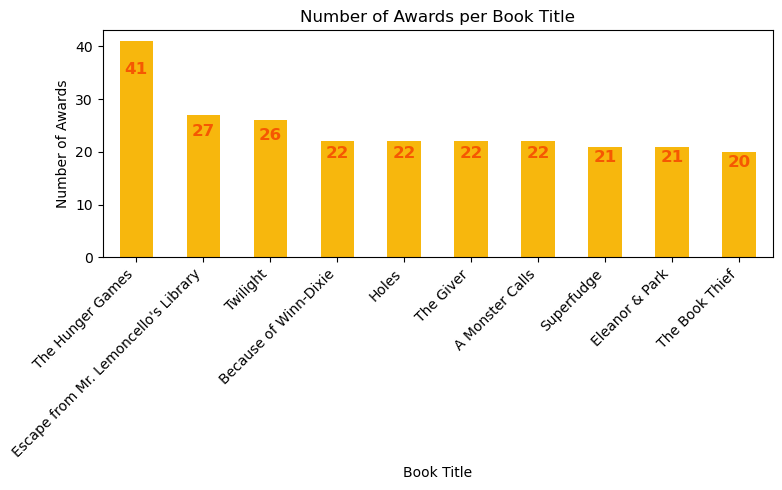

In [249]:
# bar chart for the top ten titles which got the most awards

df_top10 = (
    books_sql
    .groupby("title")
    .agg({"number_awards": "sum", "main_author": "first"})
    .sort_values("number_awards", ascending=False)
    .head(10)
    .reset_index()
)

df_top10.plot(
    kind="bar", 
    x="title", 
    y="number_awards",
    figsize=(8, 5),
    legend=False,
    color="#f7b70d"
)

for idx, row in df_top10.iterrows():
    plt.text(
        idx,                             # x-position (index of the bar)
        row["number_awards"] / 1.2,        # y-position (on the bar)
        str(row["number_awards"]),       
        ha="center",                    
        va="bottom",                     
        color="#f55802ff",
        fontsize=12,
        fontweight="bold"
    )

plt.title("Number of Awards per Book Title")
plt.xlabel("Book Title")
plt.ylabel("Number of Awards")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions from "title", "main_author" and "number_awards":</strong>
    <ul>
          <li>Stephen King received the most awards (97), followed by Neil Gaiman (75), China Mieville (69) and Suzanne Collins (62).</li>
        <li>"Hunger Games" by Suzanne Collins by far received the most awards (41), followed by "Escape from Mr. Lemoncello's Library" by Chris Grabenstein (27) and "Twilight" by Stephenie Meyer (26).</li>
    </ul>
</d>

<h1 style="color: #e3db24;">05 | Inferential Statistics</h1>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7b70d;
    border-radius: 4px;
    background-color: #e2ee1e;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next Steps:</strong>
<p>In the following, I will conduct some basic inferential statistical tests. I will only do this for few variables because many categorials have too many values to be considered truly categorial (i.e. author and title). Rating, genre, bookFormat and language a great categorial variables to do chi² and cramer's v tests on. Also, I will use author where it makes sense.</p>
</div>


In [121]:
books_sql.sample(1)

,bookId,title,rating,language,bookFormat,pages,bbeScore,price,genre,number_awards,main_author
4672,5982474-almost-perfect,Almost Perfect,3.85,English,Hardcover,368,477,5.82,Young Adult,2,Brian Katcher


<h2 style="color: #ec7511;">Chi² on "main_author" and "genre"</h2>

In [123]:
contingency_table_one = pd.crosstab(books_sql['main_author'], books_sql['genre'])
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(contingency_table_one)
cramer = association(contingency_table_one, method='cramer')
print(f"{chi2_pvalue:.30f}")
print(cramer)

0.000000000000000000000000000000
0.9032490046517924


<h2 style="color: #ec7511;">Chi² on "main_author" and "rating"</h2>

In [125]:
# as rating is a categorial variable (encoded in numbers), I will also use a chi² test here.

contingency_table_three = pd.crosstab(books_sql['main_author'], books_sql['rating'])
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(contingency_table_three)
cramer = association(contingency_table_three, method='cramer')
print(f"{chi2_pvalue:.30f}")
print(cramer)

0.000000000000000000000000000000
0.7510826718095467


<h2 style="color: #ec7511;">Chi² on "rating" and "bookFormat"</h2>

In [127]:
contingency_table_two = pd.crosstab(books_sql['rating'], books_sql['bookFormat'])
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(contingency_table_two)
cramer = association(contingency_table_two, method='cramer')
print(f"{chi2_pvalue:.10f}")
print(cramer)

0.0000000029
0.08445941952680942


<h2 style="color: #ec7511;">Chi² on "genre" and "rating"</h2>

In [129]:
contingency_table_four = pd.crosstab(books_sql['genre'], books_sql['rating'])
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(contingency_table_four)
cramer = association(contingency_table_four, method='cramer')
print(f"{chi2_pvalue:.30f}")
print(cramer)

0.000000000000000000000000000000
0.11866400800940964


<h2 style="color: #ec7511;">Chi² on "language" and "rating"</h2>

In [131]:
contingency_table_five = pd.crosstab(books_sql['language'], books_sql['rating'])
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(contingency_table_five)
cramer = association(contingency_table_five, method='cramer')
print(f"{chi2_pvalue:.30f}")
print(cramer)

0.000000000000000000000000000000
0.09902231912814548


<h2 style="color: #ec7511;">Chi² on "language" and "bookFormat"</h2>

In [133]:
contingency_table_six = pd.crosstab(books_sql['language'], books_sql['bookFormat'])
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(contingency_table_six)
cramer = association(contingency_table_six, method='cramer')
print(f"{chi2_pvalue:.10f}")
print(cramer)

0.0000000000
0.10985620012174552


<h2 style="color: #ec7511;">Chi² on "genre" and "bookFormat"</h2>

In [135]:
contingency_table_seven = pd.crosstab(books_sql['genre'], books_sql['bookFormat'])
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(contingency_table_seven)
cramer = association(contingency_table_seven, method='cramer')
print(f"{chi2_pvalue:.10f}")
print(cramer)

0.0000000000
0.12960033108130778


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #f7d90d;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions from inferential tests:</strong>
    <ul>
          <li>The only strong relationships I detected here are (not surprisingly) between "main_author" and "genre" and (only slightly weaker) between "main_author" and "rating".</li>
    </ul>
</d>

In [137]:
backup = books_sql.copy()

<h1 style="color: #e3db24;">05 | Converting Cleaned Dataframe to csv</h1>

In [139]:
books_sql.to_csv("books_sql.csv", index=False)

In [140]:
pd.read_csv("books_sql.csv")

,bookId,title,rating,language,bookFormat,pages,bbeScore,price,genre,number_awards,main_author
0,2767052-the-hunger-games,The Hunger Games,4.33,English,Hardcover,374,2993816,5.09,Young Adult,41,Suzanne Collins
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,English,Paperback,870,2632233,7.38,Fantasy,9,J.K. Rowling
2,41865.Twilight,Twilight,3.60,English,Paperback,501,1459448,2.10,Young Adult,25,Stephenie Meyer
3,19063.The_Book_Thief,The Book Thief,4.37,English,Hardcover,552,1372809,3.80,Historical Fiction,20,Markus Zusak
4,170448.Animal_Farm,Animal Farm,3.95,English,Mass Market Paperback,141,1276599,4.42,Classics,2,George Orwell
...,...,...,...,...,...,...,...,...,...,...,...
34101,11115191-attracted-to-fire,Attracted to Fire,4.14,English,Paperback,416,0,5.55,Christian Fiction,1,DiAnn Mills
34102,12395883-unbelievable,Unbelievable,4.16,English,Paperback,360,0,19.18,Romance,0,Sherry Gammon
34103,10815662-marked,Marked,3.70,English,Paperback,280,0,7.37,Fantasy,1,Kim Richardson
34104,11330278-wayward-son,Wayward Son,3.85,English,Paperback,507,0,2.86,Fiction,0,Tom Pollack


In [141]:
# Datei mit open() öffnen und Fehler ignorieren
file_path = "books_sql.csv"

with open(file_path, encoding="utf-8", errors="ignore") as f:
    books = pd.read_csv(f)

# Datei erneut als UTF-8 speichern
cleaned_file_path = "books_sql_2.csv"
books.to_csv(cleaned_file_path, index=False, encoding="utf-8")

<div style="
    padding: 10px; 
    margin: 10px 0; 
    border: 1px solid #ffeeba; 
    border-radius: 4px; 
    background-color: #e3db24; 
    color: #bb1066;
    line-height: 1.5;
    word-wrap: break-word;">
    <strong>Faulty Encoding:</strong> After cleaning and editing the dataset with python, I was not able to import it to MySQL anymore. After reasearching and consulting ChatGPT, the problem could be defined: due to a special character which were saved differently with python/ pandas and could not be read by the MySQL default character set anymore. The character string which I found to be the problem stands for the greek name Λίνα Παμπούδη. This could not be read by MySQL. After replacing it with empty spaces, I could import the file to MySQL workbench but it was only 119 rows. I could not fix this even after extensive research and trying many ways. So the SQL analysis iunfortunately is very limited, there were problems with the original dataset which I did not see at the beginning.
</div>

In [143]:
books_sql_3 = books_sql.copy()

In [144]:
books_sql_3.to_csv("books_sql_3.csv", index=False, encoding="utf-8", quotechar='"', quoting=1)
books_sql_4 = pd.read_csv("books_sql_3.csv", encoding="utf-8") # only to check whether this can be imported

In [145]:
with open("books_sql_3.csv", "rb") as file: # rb= binary modus, content is shown as bytes not text
    data = file.read()
    # shows the problematic special characters location
    if b'\x8d' in data: # byte 0x8d was given by MySQL as the one which could not be decoded (in the error message) 
        position = data.find(b'\x8d')
        print(f"Problematic special characters found at index {position}: {data[position-20:position+20]}") # returns the position (index)

Problematic special characters found at index 19428: b'"402093.Sh_gun","Sh\xc5\x8dgun","4.39","Englis'


In [146]:
books_sql_3.loc[19428]

bookId                             1312205.Understanding_the_Times
title            Understanding the Times: The Collision of Toda...
rating                                                        4.11
language                                                   English
bookFormat                                               Hardcover
pages                                                          510
bbeScore                                                        95
price                                                         6.47
genre                                                   Philosophy
number_awards                                                    0
main_author                                        David A. Noebel
Name: 19428, dtype: object

In [147]:
books_sql_4 = books_sql_3.drop(index=19428)
books_sql_4.to_csv("books_sql_4.csv", index=False, encoding="utf-8", quotechar='"', quoting=1)

In [148]:
with open("books_sql_4.csv", "rb") as file: # rb= binary modus, content is shown as bytes not text
    data = file.read()
    # shows the problematic special characters location
    if b'\x8d' in data: # byte 0x8d was given by MySQL as the one which could not be decoded (in the error message) 
        position = data.find(b'\x8d')
        print(f"Problematic special characters found at index {position}: {data[position-20:position+20]}") # returns the position (index)

Problematic special characters found at index 19428: b'"402093.Sh_gun","Sh\xc5\x8dgun","4.39","Englis'


In [149]:
print(19428 in books_sql_4.index) # should be false and is so

False


In [150]:
books_sql_4.to_csv("books_sql_4.csv", index=False, encoding="utf-8", quotechar='"', quoting=1)

# load dataframe again
reloaded_df = pd.read_csv("books_sql_4.csv")
print(reloaded_df.loc[reloaded_df.index == 19428])  # should be empty but is not

                      bookId            title  rating language bookFormat  \
19428  28677.The_Spirit_Ring  The Spirit Ring    3.63  English  Paperback   

       pages  bbeScore  price    genre  number_awards           main_author  
19428    369        95   4.91  Fantasy              0  Lois McMaster Bujold  


In [151]:
# trying to drop the index again
books_sql_3.reset_index(drop=True, inplace=True)
books_sql_4 = books_sql_3.drop(index=19428)

In [152]:
print(19428 in books_sql_4.index)  # should be false and is so

False


In [153]:
books_sql_4.to_csv("books_sql_4.csv", index=False, encoding="utf-8", quotechar='"', quoting=1)

# load again
reloaded_df = pd.read_csv("books_sql_4.csv")
print(reloaded_df.loc[reloaded_df.index == 19428])  # # should be empty but is not

                      bookId            title  rating language bookFormat  \
19428  28677.The_Spirit_Ring  The Spirit Ring    3.63  English  Paperback   

       pages  bbeScore  price    genre  number_awards           main_author  
19428    369        95   4.91  Fantasy              0  Lois McMaster Bujold  
